# Customer Segmentation 

**Task:** Perform customer segmenation with purchase history data.

## Import the necessary libraries 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 10)
matplotlib.style.use('ggplot')
%matplotlib inline

## 1. Load the data 

As we know there are three columns are related with datetime data, we ask pandas to parse them as datetime format.

In [2]:
raw_data = pd.read_csv("./Customer_Data.csv", parse_dates=[1, 2, 9], infer_datetime_format=True)
raw_data.head()

,dim_customer_key,first_order_date,last_order_date,newsletter_gender,inferred_gender,dim_product_key,id_sales_order_item,id_sales_order,net_revenue,order_created_at
0,2506804,2014-06-05,2017-01-12,[Unknown],female,1642493,14080743,6523947,12.710,2016-12-31 16:33:11
1,1605816,2012-06-19,2016-12-23,[Unknown],female,1701388,13978855,6476337,15.895,2016-12-23 22:43:33
2,3842991,NaT,NaT,[Unknown],[Unknown],1677861,14078402,6522765,81.360,2016-12-31 08:39:21
3,2858832,2015-02-19,2017-01-10,female,female,1664373,14080202,6523682,25.450,2016-12-31 14:43:32
4,2556567,2015-02-27,2017-01-07,female,female,1776134,14079655,6523393,31.795,2016-12-31 12:54:21


## 2. Explore the data and clean the data

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 10 columns):
dim_customer_key       608 non-null int64
first_order_date       605 non-null datetime64[ns]
last_order_date        605 non-null datetime64[ns]
newsletter_gender      608 non-null object
inferred_gender        608 non-null object
dim_product_key        608 non-null int64
id_sales_order_item    608 non-null int64
id_sales_order         608 non-null int64
net_revenue            608 non-null float64
order_created_at       608 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 47.6+ KB


There are 608 customer data with purchase records. Only the field "net_revenue" is numerical data, other fields are categorical data such as IDs, genders, dates. 

Let see the distribution of net_revenue for each product.

In [4]:
raw_data['net_revenue'].describe()

count    608.000000
mean      33.366579
std       21.191527
min        3.400000
25%       18.998750
50%       29.070000
75%       40.905000
max      135.905000
Name: net_revenue, dtype: float64

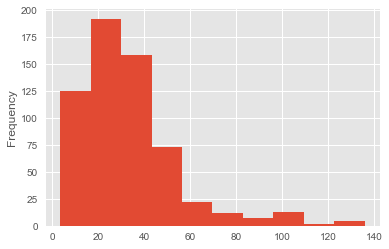

In [5]:
raw_data['net_revenue'].plot(kind='hist')

### 2.1 How many distinct customers in the data and how many orders per customer 

In [6]:
raw_data['dim_customer_key'].unique().shape[0]

10

In [7]:
raw_data['dim_customer_key'].value_counts()

1605816    144
3196999    139
2556567     97
2487338     70
2858832     37
1631812     36
2506804     30
3831319     29
3545376     23
3842991      3
Name: dim_customer_key, dtype: int64

Only 10 customer purchase history data are presented. Let us look at the customers with most orders and lest orders.

In [8]:
raw_data[raw_data['dim_customer_key'] == 1605816]

,dim_customer_key,first_order_date,last_order_date,newsletter_gender,inferred_gender,dim_product_key,id_sales_order_item,id_sales_order,net_revenue,order_created_at
1,1605816,2012-06-19,2016-12-23,[Unknown],female,1701388,13978855,6476337,15.895,2016-12-23 22:43:33
37,1605816,2012-06-19,2016-12-23,[Unknown],female,1604619,13978856,6476337,49.770,2016-12-23 22:43:33
60,1605816,2012-06-19,2016-12-23,[Unknown],female,1716402,12101015,5630319,27.270,2016-09-16 08:48:27
61,1605816,2012-06-19,2016-12-23,[Unknown],female,557564,12101014,5630319,36.340,2016-09-16 08:48:27
62,1605816,2012-06-19,2016-12-23,[Unknown],female,200989,12101013,5630319,49.990,2016-09-16 08:48:27
...,...,...,...,...,...,...,...,...,...,...
602,1605816,2012-06-19,2016-12-23,[Unknown],female,1621343,13292664,6162446,36.340,2016-11-23 10:40:36
603,1605816,2012-06-19,2016-12-23,[Unknown],female,1640433,13292663,6162446,40.905,2016-11-23 10:40:36
604,1605816,2012-06-19,2016-12-23,[Unknown],female,1749048,13292665,6162446,45.430,2016-11-23 10:40:36
605,1605816,2012-06-19,2016-12-23,[Unknown],female,1594067,12903306,5991792,28.620,2016-11-02 11:08:49


In [9]:
raw_data[raw_data['dim_customer_key'] == 3842991]

,dim_customer_key,first_order_date,last_order_date,newsletter_gender,inferred_gender,dim_product_key,id_sales_order_item,id_sales_order,net_revenue,order_created_at
2,3842991,NaT,NaT,[Unknown],[Unknown],1677861,14078402,6522765,81.36,2016-12-31 08:39:21
11,3842991,NaT,NaT,[Unknown],[Unknown],1677861,14078409,6522769,81.36,2016-12-31 08:41:34
514,3842991,NaT,NaT,[Unknown],[Unknown],1677861,14078362,6522743,81.36,2016-12-31 08:24:50


It seems this customer did the purchase with THE ICONIC for the first time, we can infer the first and last order date are the same as order creatation date.

In [10]:
customer_ix = raw_data[raw_data['dim_customer_key'] == 3842991].index
order_date = raw_data[raw_data['dim_customer_key'] == 3842991].iloc[0, 9].date()
# order_date

In [11]:
raw_data.ix[customer_ix, 'first_order_date'] = order_date
raw_data.ix[customer_ix, 'last_order_date'] = order_date

In [12]:
raw_data[raw_data['dim_customer_key'] == 3842991]

,dim_customer_key,first_order_date,last_order_date,newsletter_gender,inferred_gender,dim_product_key,id_sales_order_item,id_sales_order,net_revenue,order_created_at
2,3842991,2016-12-31,2016-12-31,[Unknown],[Unknown],1677861,14078402,6522765,81.36,2016-12-31 08:39:21
11,3842991,2016-12-31,2016-12-31,[Unknown],[Unknown],1677861,14078409,6522769,81.36,2016-12-31 08:41:34
514,3842991,2016-12-31,2016-12-31,[Unknown],[Unknown],1677861,14078362,6522743,81.36,2016-12-31 08:24:50


### 2.2 Correct the last order date
During spot check, it is found that the last order date is incorrect for some customers, e.g. customer_id 3196999, the last_order_date is **2016-12-11**, while the latest order is made on **2017-01-12**

In [13]:
raw_data[raw_data['dim_customer_key'] == 3196999]['first_order_date'].iloc[0].date()

datetime.date(2015, 12, 21)

In [14]:
raw_data[raw_data['dim_customer_key'] == 3196999]['last_order_date'].iloc[0].date()

datetime.date(2016, 12, 11)

In [15]:
raw_data[raw_data['dim_customer_key'] == 3196999]['order_created_at'].min().date()

datetime.date(2015, 12, 21)

In [16]:
raw_data[raw_data['dim_customer_key'] == 3196999]['order_created_at'].max().date()

datetime.date(2017, 1, 12)

We define a function to correct this error.

In [17]:
def correct_last_order_date(df):
    """helper function to correct the last_order_date column according to 
       order_created_at column
    """
    for customer in df['dim_customer_key'].unique():
        cusomter_ix = df[df['dim_customer_key'] == customer].index
        first_date_correct = df.ix[cusomter_ix, 'order_created_at'].min().date()
        last_date_correct = df.ix[cusomter_ix, 'order_created_at'].max().date()
        
        # check first_order_date
        if first_date_correct != pd.datetime.utcfromtimestamp(df.ix[cusomter_ix, 'first_order_date'].unique()[0].tolist()/1e9).date():
            df.ix[cusomter_ix, 'first_order_date'] = first_date_correct
        
        # check last_order_date
        if last_date_correct != pd.datetime.utcfromtimestamp(df.ix[cusomter_ix, 'last_order_date'].unique()[0].tolist()/1e9).date():
            df.ix[cusomter_ix, 'last_order_date'] = last_date_correct
        
    return df
        

In [18]:
clean_data = correct_last_order_date(raw_data)

Now we can expect the last_order_date is 2017-01-12

In [19]:
clean_data[clean_data['dim_customer_key'] == 3196999]['last_order_date'].iloc[0].date()

datetime.date(2017, 1, 12)

## 3. Customer Segmenation based on customer purchase activities 

### 3.1 Active days per customer
It can be derived from first order date and last order date.

In [29]:
clean_data['active_days'] = (clean_data['last_order_date'] - clean_data['first_order_date']).apply(lambda d: d.days + 1)

In [73]:
customer_segments = clean_data.groupby('dim_customer_key', as_index=False)[['active_days']].mean()
customer_segments

,dim_customer_key,active_days
0,1605816,1649
1,1631812,1664
2,2487338,1033
3,2506804,953
4,2556567,681
5,2858832,692
6,3196999,389
7,3545376,172
8,3831319,1
9,3842991,1


In [74]:
order_date_per_customer = clean_data[['dim_customer_key', 'first_order_date', 'last_order_date']].drop_duplicates()
# last_order_date_per_customer

In [75]:
customer_segments = customer_segments.join(order_date_per_customer.set_index('dim_customer_key'), 
                       on='dim_customer_key', how='inner')

### 3.2 Number of orders done per customer and the gross net revenue per order

Firstly, we need to aggregate each order per customer.

In [76]:
customer_orders = raw_data.groupby(['dim_customer_key', 'id_sales_order'], as_index=False)[['net_revenue']].sum()

Then we can calculate the number of orders per customer.

In [77]:
orders_per_customer = customer_orders.groupby('dim_customer_key', as_index=False)['id_sales_order'].count()
# orders_per_customer

And we can calculate average net reveneue per customer and the total net revenue per customer.

In [78]:
revenue_per_customer = customer_orders.groupby('dim_customer_key', as_index=False)['net_revenue'].agg(['mean', 'sum'])
# revenue_per_customer

Finally, we can join all these data together.

In [79]:
customer_segments = customer_segments.join(orders_per_customer.set_index('dim_customer_key'), 
                                           on=['dim_customer_key'], how='left', lsuffix='_1')

In [80]:
customer_segments = customer_segments.join(revenue_per_customer, 
                                           on=['dim_customer_key'], how='left', lsuffix='_1')

In [82]:
customer_segments.columns = ['dim_customer_key', 'active_days','first_order_date', 'last_order_date', 'number_of_orders', 'avg_net_revenue_per_order', 'total_net_revenue']
customer_segments

,dim_customer_key,active_days,first_order_date,last_order_date,number_of_orders,avg_net_revenue_per_order,total_net_revenue
0,1605816,1649,2012-06-19,2016-12-23,60,85.362667,5121.760
1,1631812,1664,2012-06-13,2017-01-01,20,47.904500,958.090
2,2487338,1033,2014-02-28,2016-12-26,29,57.732414,1674.240
3,2506804,953,2014-06-05,2017-01-12,15,51.515667,772.735
4,2556567,681,2015-02-27,2017-01-07,57,48.728070,2777.500
5,2858832,692,2015-02-19,2017-01-10,14,67.418571,943.860
6,3196999,389,2015-12-21,2017-01-12,21,263.139286,5525.925
7,3545376,172,2016-07-13,2016-12-31,19,51.352895,975.705
8,3831319,1,2016-12-23,2016-12-23,29,44.585690,1292.985
9,3842991,1,2016-12-31,2016-12-31,3,81.360000,244.080


### 3.3 Customer segmentation and visualisation

Based on the results processed above, we can segment customers into:
* **VIP customer**: who is active more than 1 year with total net revenue more than 1500. E.g. customer 1605816, 2487338, 2556567, 3196999
* **Potential VIP customer**: who is active less than 1 year with total net revenue more than 800. E.g. customer 3545376, 3831319
* **Regular customer**: who is active more than 1 year with total net revenue less than 1500. E.g. custome 1631812, 2506804, 2858832
* **New customer**: who just does the first purchase in the recent two months and total net revenue less than 800. E.g. customer 3842991

In [100]:
customer_segments['segmentation'] = 0
customer_segments.loc[(customer_segments['active_days'] > 365) & (customer_segments['total_net_revenue'] > 1500), 'segmentation'] = 'VIP'
customer_segments.loc[(customer_segments['active_days'] < 365) & (customer_segments['total_net_revenue'] > 800), 'segmentation'] = 'Potential'
customer_segments.loc[(customer_segments['active_days'] > 365) & (customer_segments['total_net_revenue'] < 1500), 'segmentation'] = 'Regular'
customer_segments.loc[(customer_segments['first_order_date'] > (pd.datetime.now() - pd.tseries.offsets.Day(62))) & (customer_segments['total_net_revenue'] < 800), 'segmentation'] = 'New'

In [101]:
customer_segments

,dim_customer_key,active_days,first_order_date,last_order_date,number_of_orders,avg_net_revenue_per_order,total_net_revenue,segmentation
0,1605816,1649,2012-06-19,2016-12-23,60,85.362667,5121.760,VIP
1,1631812,1664,2012-06-13,2017-01-01,20,47.904500,958.090,Regular
2,2487338,1033,2014-02-28,2016-12-26,29,57.732414,1674.240,VIP
3,2506804,953,2014-06-05,2017-01-12,15,51.515667,772.735,Regular
4,2556567,681,2015-02-27,2017-01-07,57,48.728070,2777.500,VIP
5,2858832,692,2015-02-19,2017-01-10,14,67.418571,943.860,Regular
6,3196999,389,2015-12-21,2017-01-12,21,263.139286,5525.925,VIP
7,3545376,172,2016-07-13,2016-12-31,19,51.352895,975.705,Potential
8,3831319,1,2016-12-23,2016-12-23,29,44.585690,1292.985,Potential
9,3842991,1,2016-12-31,2016-12-31,3,81.360000,244.080,New


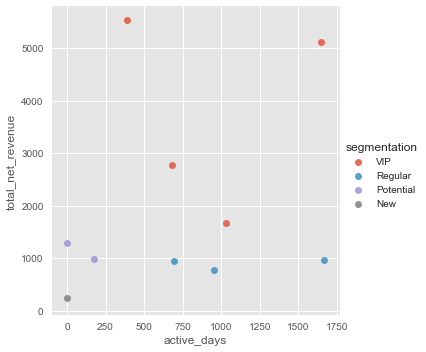

In [102]:
sns.lmplot(x='active_days', y='total_net_revenue', data=customer_segments, hue='segmentation', fit_reg=False)
plt.show()

## 4. Conclusion and future work 

The above customer segmentation is performed based on customer purchase history and the net revenue per customer. 

According to different business requirements, we can perform customer segmentation based on different criterias, such as the gender and product preference, or seasonal purchase patterns (e.g. Christmas season, summer, etc.) given that more data are available.

If the dataset are huge enough, it will be beneficial to apply machine learning techniques such as K-means clustering or hierarchical clustering as the first step to gain insights of clustering of customer data. Then we can fine tune the number of clustering / segmentation based on business requirement and criterias.

Data science is a field with inter discipline skills including mathmaticas, statistics, programming and domain knowledge. It is expected to yield better result if the business logic and requirement is well defined for the data analytics.